In [1]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

# US Border Activity

We use a dataset that contains monthly temporal data for crossings into the US from both the US-Canadian border, and the US-Mexican border. In this notebook we will apply several data analysis approaches to answer questions regarding the data.

In [2]:
replace_dict = {'Border':{'US-Canada Border':'CA','US-Mexico Border':'MX'}}

border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')

border_crossing_full = border_crossing_full.replace(replace_dict)
border_crossing_full[['Month','Year']] = border_crossing_full['Date'].str.split(" ",expand=True)
border_crossing_full = border_crossing_full.drop(['Port Name','Point','Date'],axis=1)
coordless_border_crossing = border_crossing_full.drop(['Latitude','Longitude'],axis=1)

In [3]:
border_crossing_full.shape

(380467, 9)

In [4]:
#groupedState = coordless_border_crossing.groupby('State').agg('first')
#groupedState.head(15)

### 1. Comparing Canadian and Mexican entries


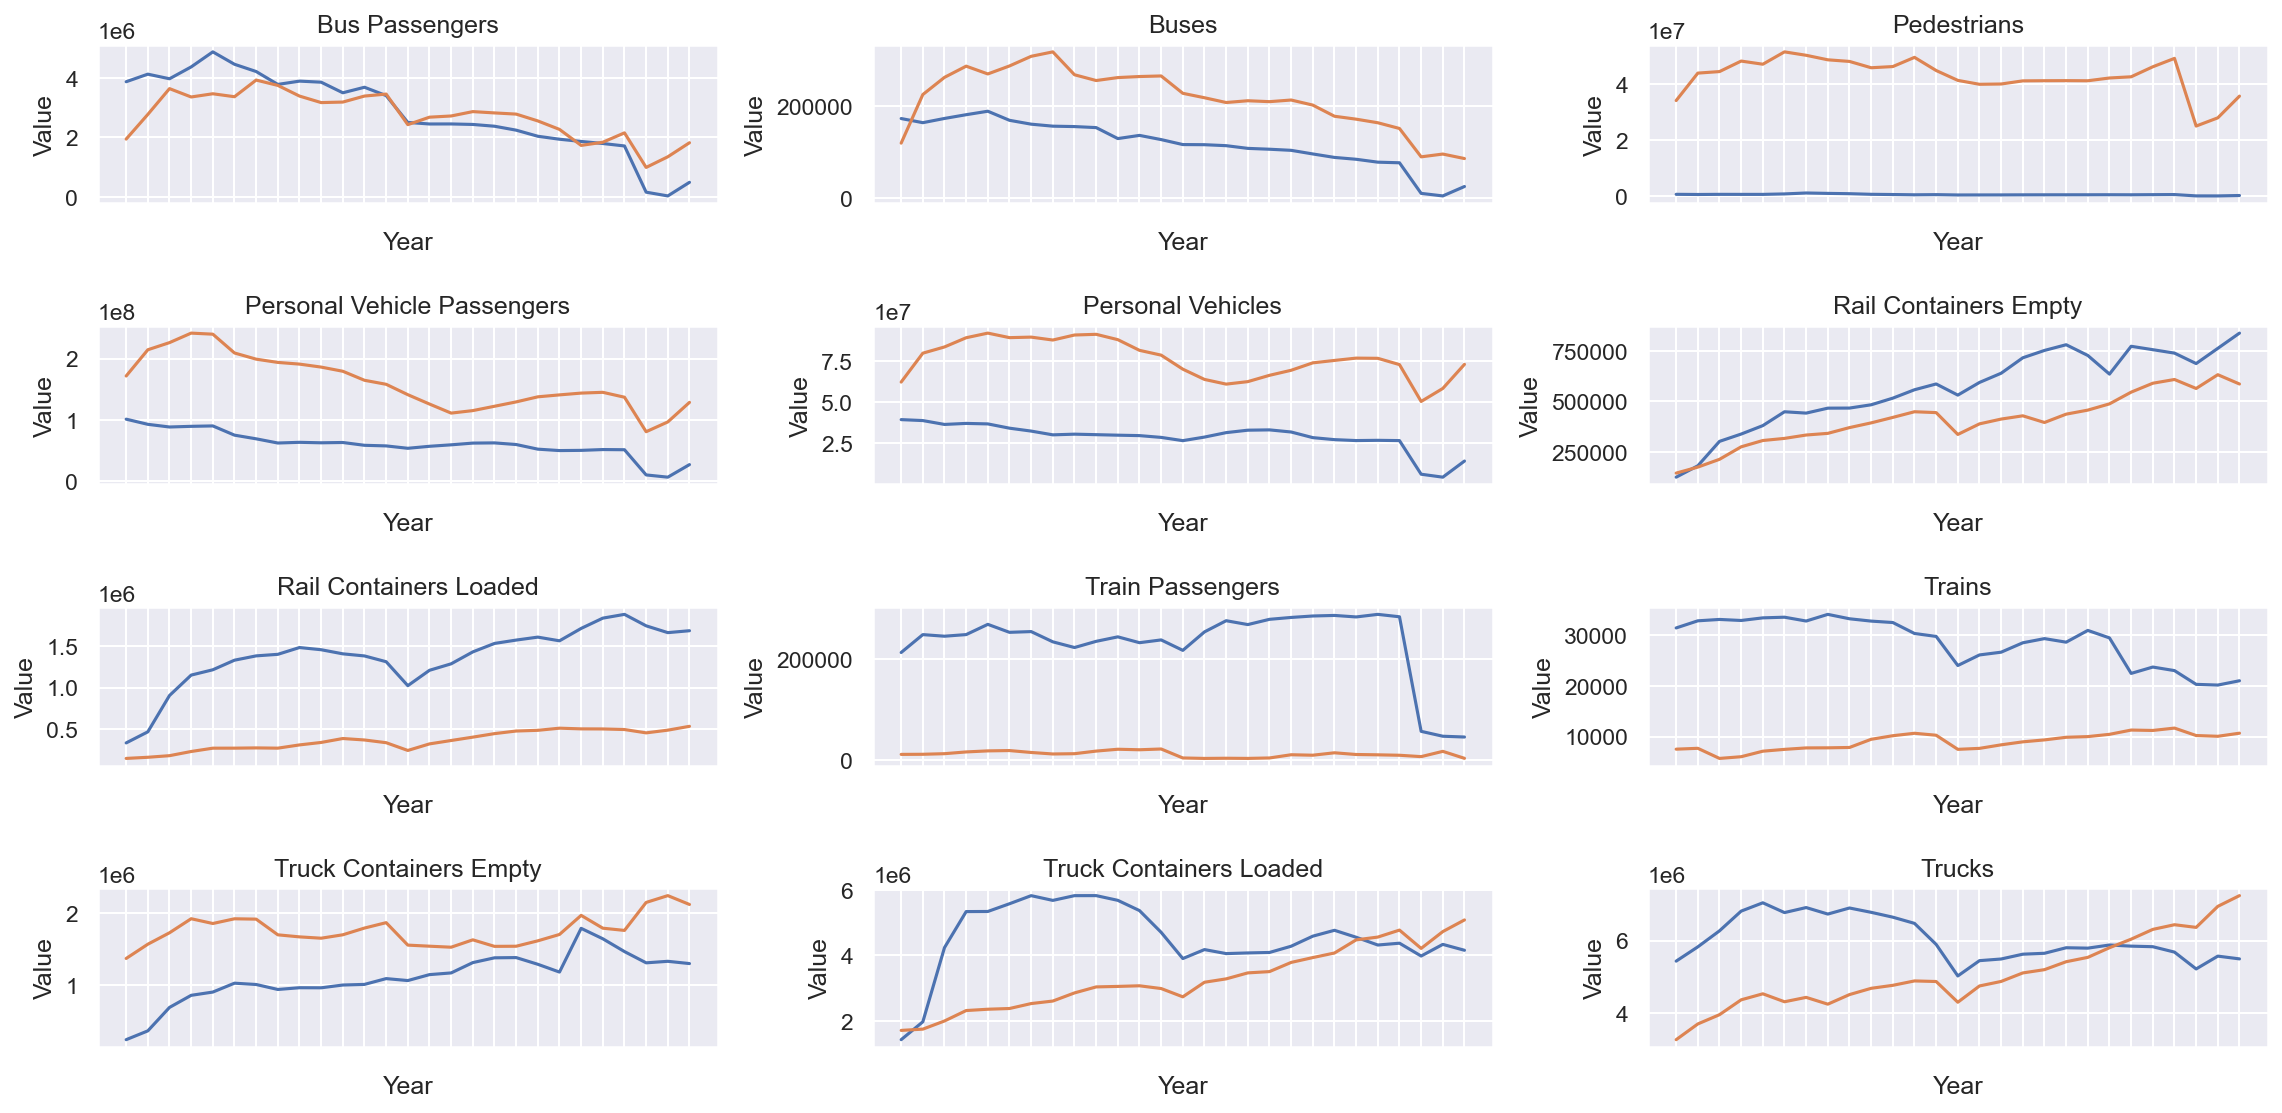

In [5]:
### CODE HERE

canadafilter = border_crossing_full['Border'] == 'CA'
mexicofilter = ~canadafilter

canadacrossings = border_crossing_full.loc[canadafilter]
mexicocrossings = border_crossing_full.loc[mexicofilter]

border_crossing_years = border_crossing_full[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
canada_activity = canadacrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
mexico_activity = mexicocrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')

fig, axs = plt.subplots(nrows=4,ncols=3)
fig.tight_layout(pad=3)
ax = sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Canada')
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Mexico').title.set_text('Bus Passengers')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Combined')
ax.set_xticklabels([])  
ax.get_legend().remove()
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).title.set_text('Buses')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).title.set_text('Pedestrians')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).title.set_text('Personal Vehicle Passengers')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).title.set_text('Personal Vehicles')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).title.set_text('Rail Containers Empty')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).title.set_text('Rail Containers Loaded')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).title.set_text('Train Passengers')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).title.set_text('Trains')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).title.set_text('Truck Containers Empty')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).title.set_text('Truck Containers Loaded')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1])
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).title.set_text('Trucks')
sns.lineplot(border_crossing_years.loc[border_crossing_years['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2])
fig.legend()
fig.suptitle('Comparing Canadian to Mexican entries into the US split over transportation options')
fig.show()




*** Observations Question 1 ***

### 1.5. How does the mode of transportation change over time


In [ ]:
### CODE HERE

*** Observations Question 1.5 ***
<br>
Decline in the use of buses, massive decline in use of trains as transport

### 2. How do the number of entries change between 1996 until now, and how will they change in the future?

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')
border_crossing_monthly = border_crossing_full.groupby('Date').agg(sum)
border_crossing_monthly['date'] = border_crossing_monthly.index
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,Apr 1996
Apr 1997,3041976,38632051,54247.92,-123111.096,Apr 1997
Apr 1998,3041976,42047792,54247.92,-123111.096,Apr 1998
Apr 1999,3041976,43042565,54247.92,-123111.096,Apr 1999
Apr 2000,3041976,44639294,54247.92,-123111.096,Apr 2000


In [30]:
for i in range(0, border_crossing_monthly['date'].shape[0]):
    month, year = border_crossing_monthly['date'].iloc[i].split(" ")
    for j in range(0, 12):
        if month=="Jan":
            month = 1
        if month=="Feb":
            month = 2
        if month=="Mar":
            month = 3
        if month=="Apr":
            month = 4
        if month=="May":
            month = 5
        if month=="Jun":
            month = 6
        if month=="Jul":
            month = 7
        if month=="Aug":
            month = 8
        if month=="Sep":
            month = 9
        if month=="Oct":
            month = 10
        if month=="Nov":
            month = 11
        if month=="Dec":
            month = 12
    date = (int(year)-1996)*12 + month
    border_crossing_monthly['date'].iloc[i] = date
        
border_crossing_monthly.head()

C:\Users\roman\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,4
Apr 1997,3041976,38632051,54247.92,-123111.096,16
Apr 1998,3041976,42047792,54247.92,-123111.096,28
Apr 1999,3041976,43042565,54247.92,-123111.096,40
Apr 2000,3041976,44639294,54247.92,-123111.096,52


In [31]:
border_crossing_monthly = border_crossing_monthly.sort_values(by=['date'], ascending=True)
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Jan 1996,3041976,32550342,54247.92,-123111.096,1
Feb 1996,3041976,32212625,54247.92,-123111.096,2
Mar 1996,3041976,35509073,54247.92,-123111.096,3
Apr 1996,3041976,35690321,54247.92,-123111.096,4
May 1996,3041976,37644486,54247.92,-123111.096,5


<AxesSubplot:xlabel='date', ylabel='Value'>

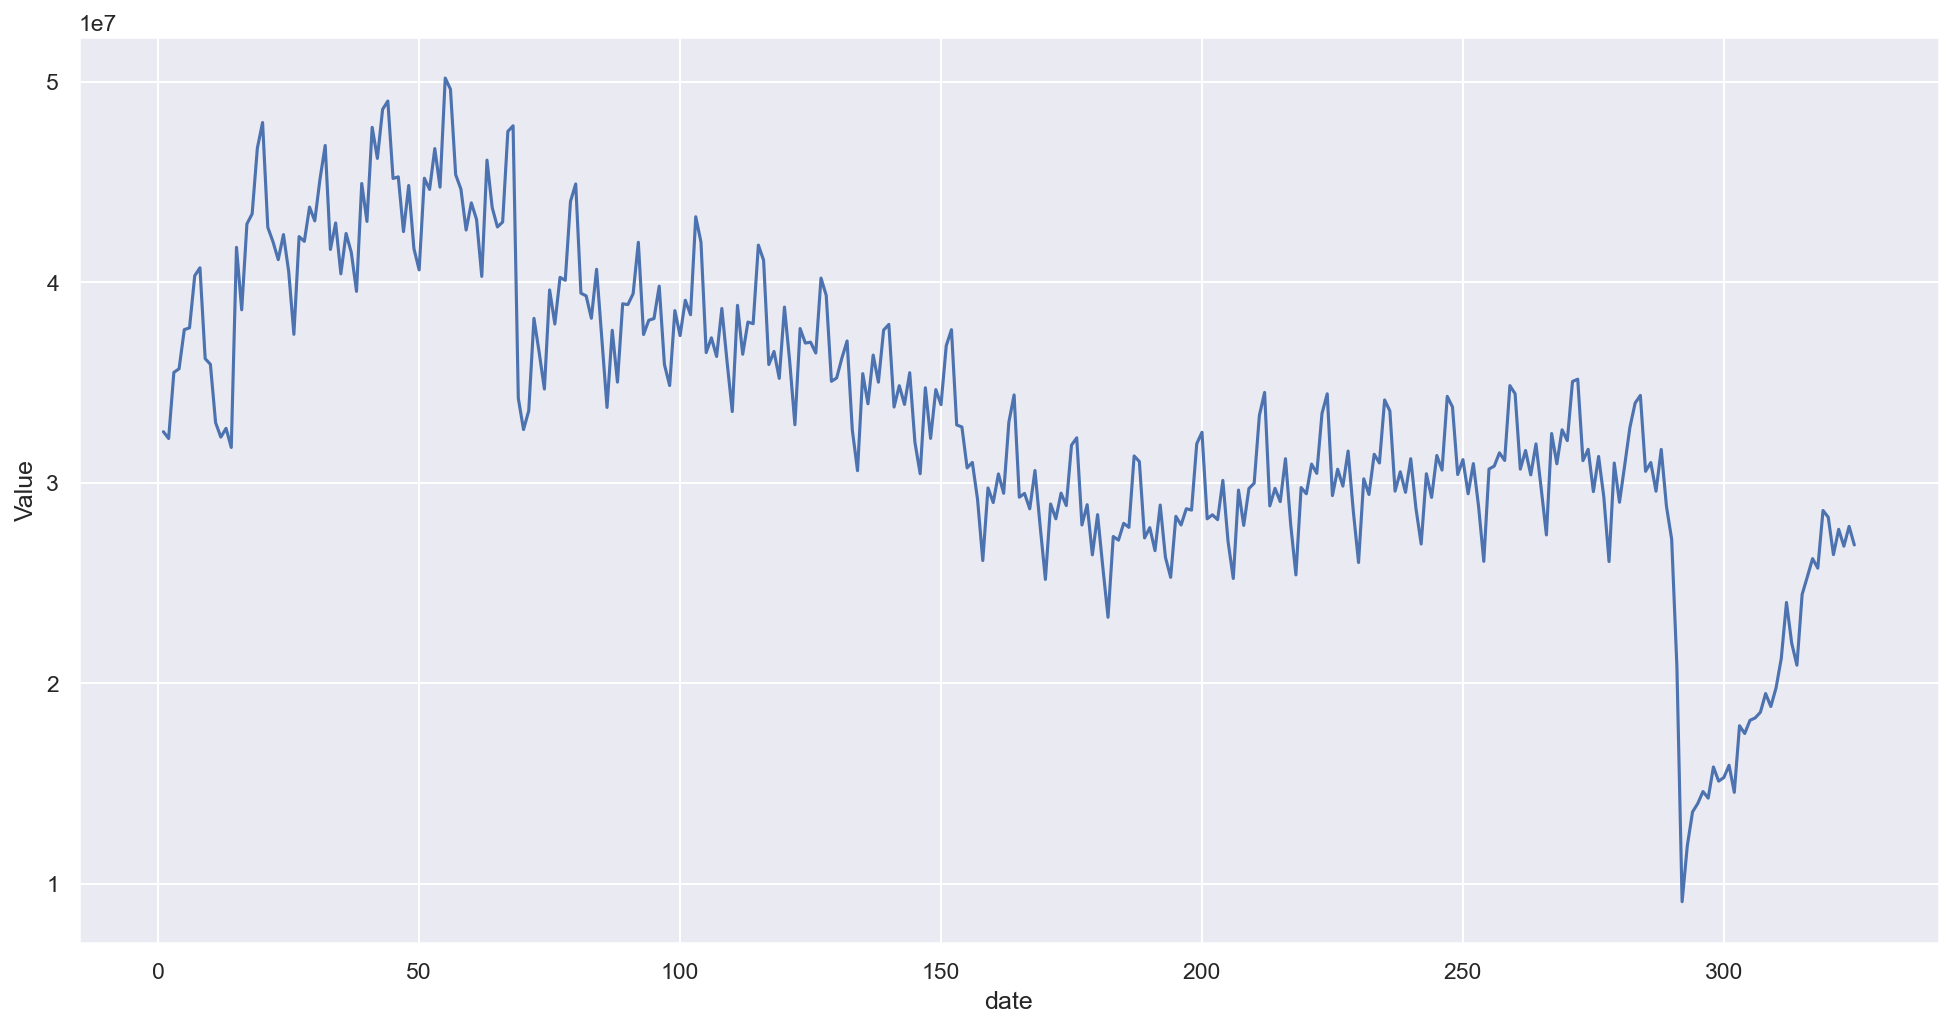

In [32]:
sns.lineplot(border_crossing_monthly,x='date',y='Value')

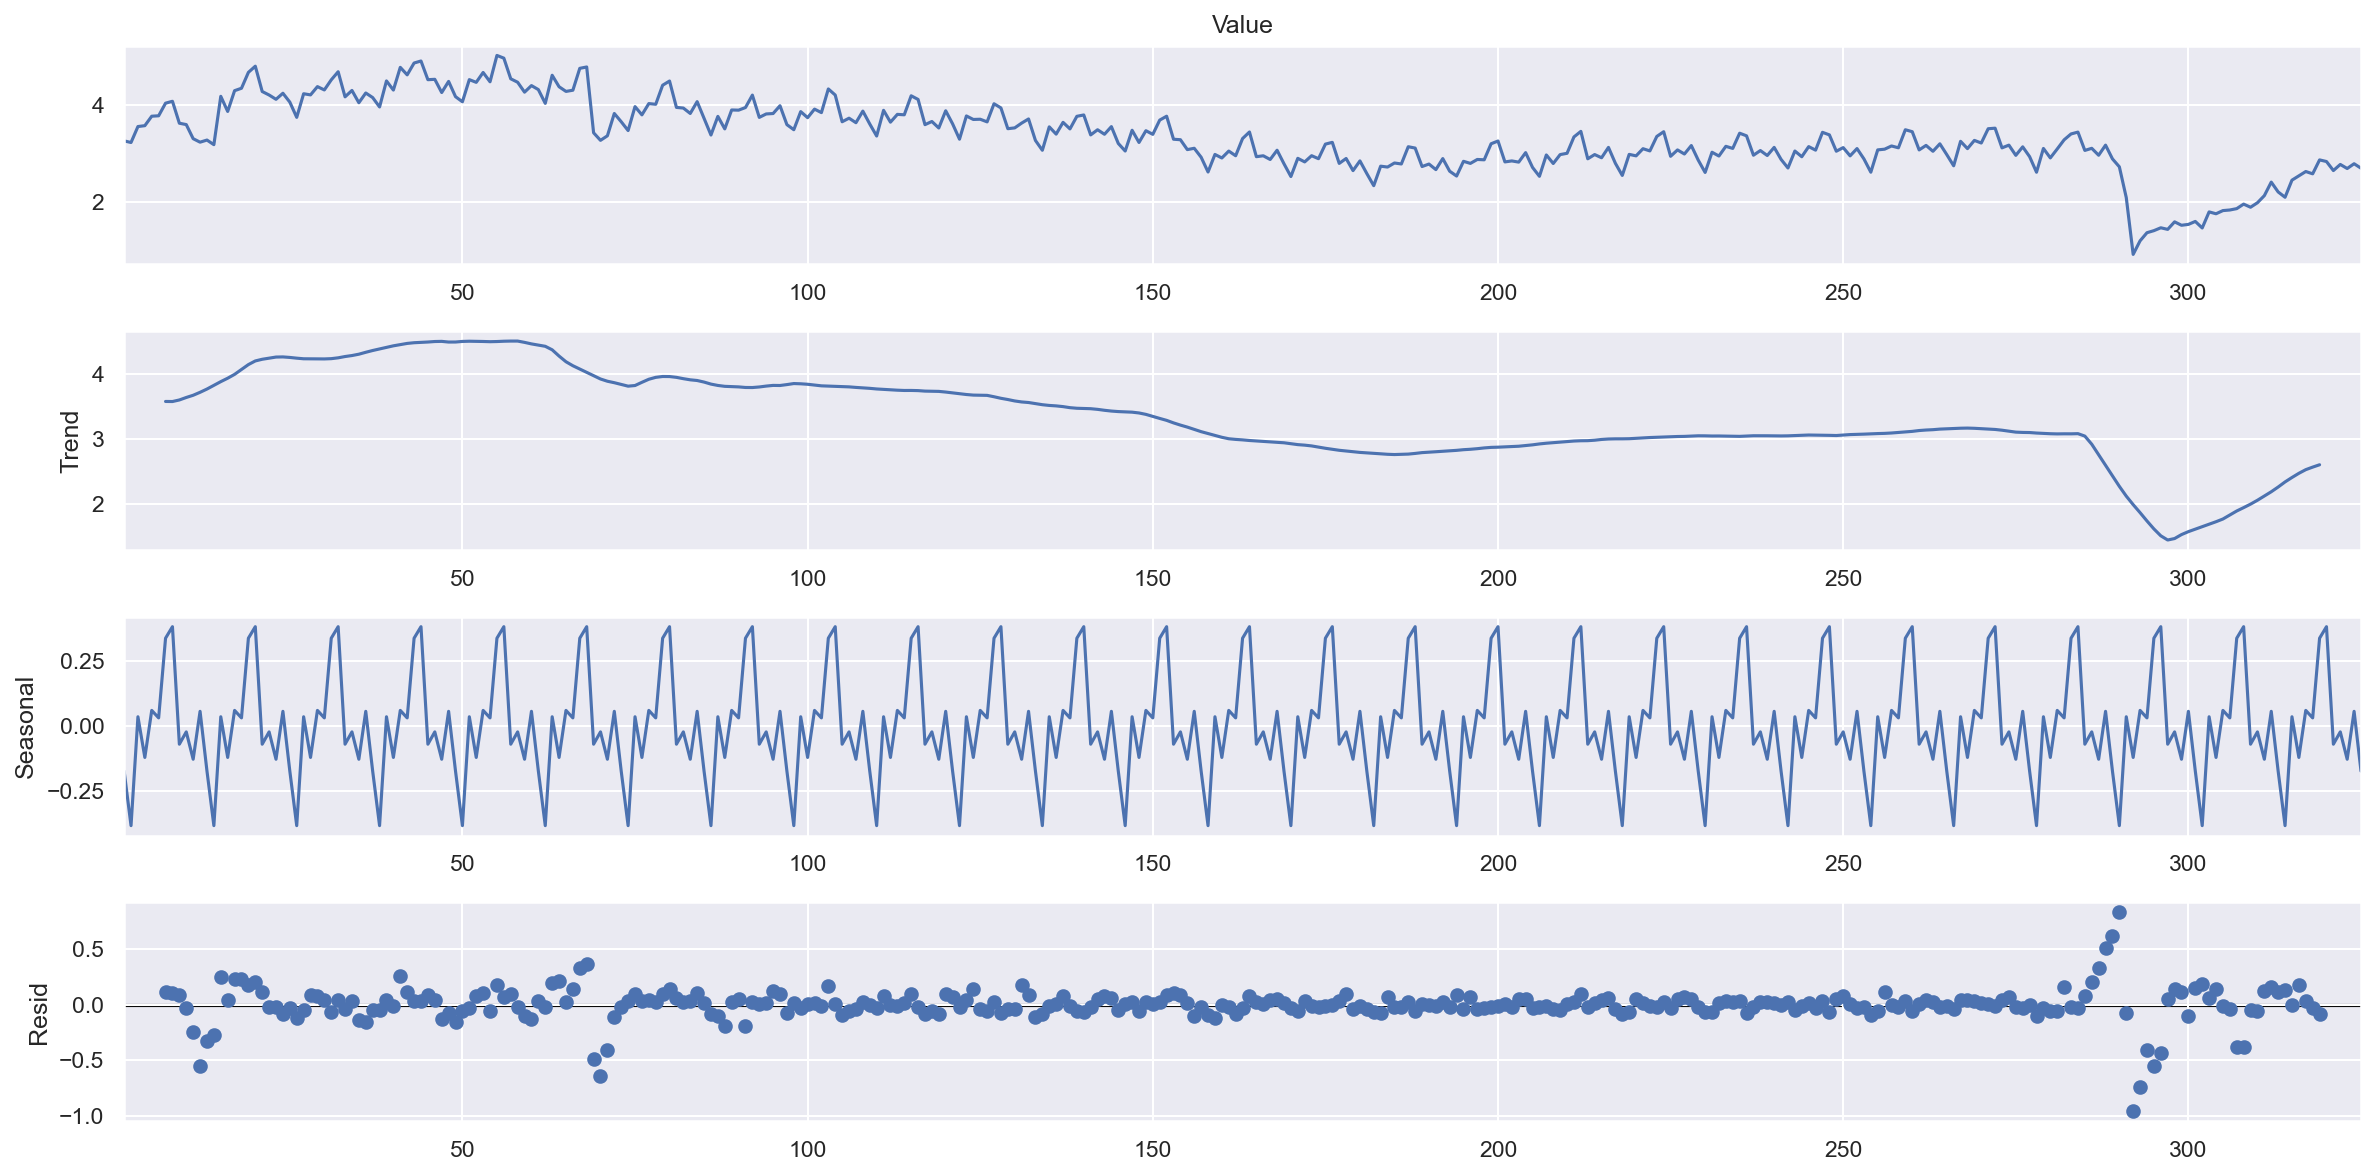

In [34]:
decompfreq = 12
model = 'additive'
 
decomposition = seasonal_decompose(
    (border_crossing_monthly.set_index("date").Value/1e7).interpolate('linear'),
    period = decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches(16, 8)

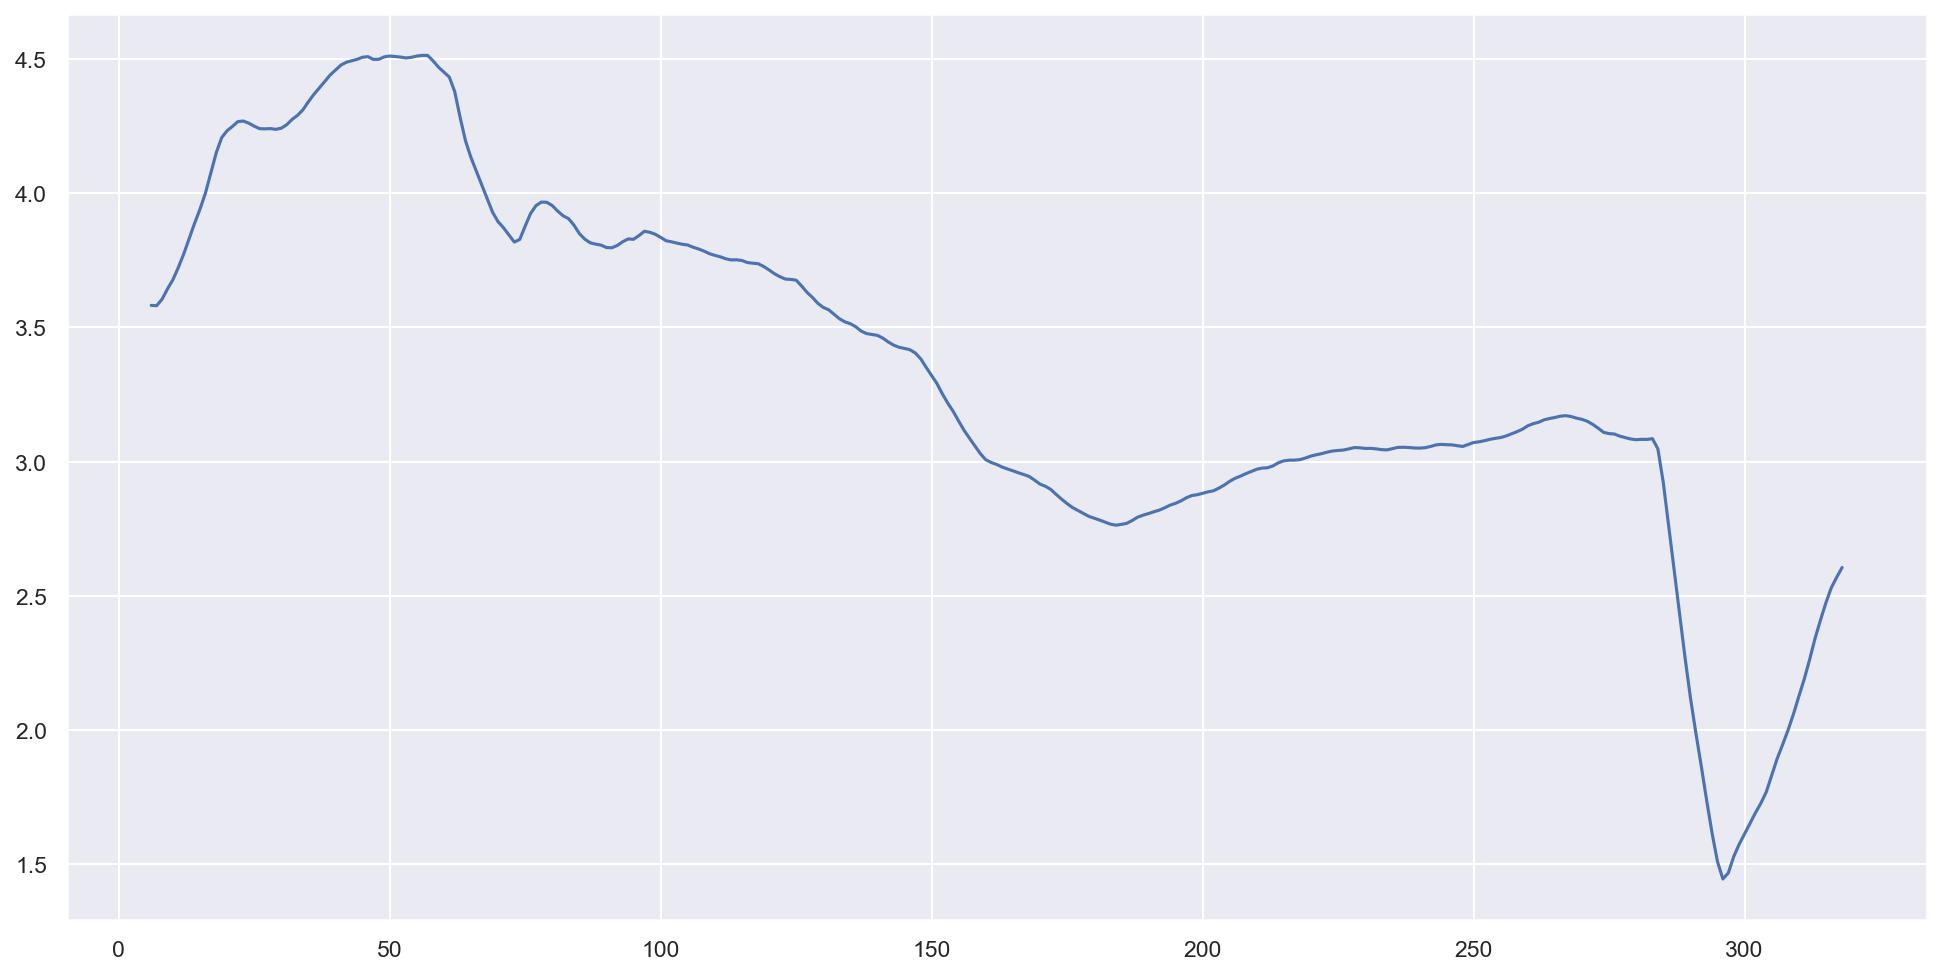

In [35]:
plt.plot(trend.values)

general trend: decreasing (with seasonality)
3 trend changing points (2001, 2010, 2020)
slight increase in beginning till 2001

### 2.5. Are there any corrolations between historical events and the entry data?

In [10]:
### CODE HERE

*** Observations Question 2.5 ***

### 4. Does the activity of the most used ports change over time?

In [11]:
### CODE HERE

*** Observations Question 4 ***